In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
from subtle.subtle_preprocess import scale_im

plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (12, 10)

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

def png2npy(fpath_png):
    return np.array(Image.open(fpath_png))[..., 0]

def get_kw_vol(viz_path, case_id, kw='gt'):
    kw_files = [f for f in glob('{}/{}/*_{}.png'.format(viz_path, case_id, kw))]
    kw_files = sorted(kw_files, key=lambda s: int(s.split('/')[-1].split('_')[0]))

    kw_vol = np.array([png2npy(f) for f in kw_files])
    return kw_vol

/home/srivathsa/projects/SubtleGad/train/subtle/utils/hyperparameter.py:8: UserWarning: Module test_tube not found - hyperparameter related functions cannot be used
  warnings.warn('Module test_tube not found - hyperparameter related functions cannot be used')
/home/srivathsa/miniconda3/envs/mmt/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 432x288 with 0 Axes>

In [2]:
viz_path = '/home/srivathsa/projects/SubtleGad/train/prototypes/mmt/MMTUNetHybrid/vis_results/BraTS/single/MMT/1101'
viz_path2 = '/home/srivathsa/projects/SubtleGad/train/prototypes/mmt/MMTUNetHybrid/model/'
viz_path2 += 'MMT_single_no_gan_epo100_bs24_lrg0.0005_5.0_20.0_0.0_0.0_vgg0/viz/test/013'
case_id = 'BraTS2021_00613'

gt_vol = get_kw_vol(viz_path, case_id, kw='gt')
op_vol = get_kw_vol(viz_path, case_id, kw='output')
# op_vol = scale_im(gt_vol, op_vol)
op_vol2 = get_kw_vol(viz_path2, case_id, kw='output')
ip_vol = get_kw_vol(viz_path, case_id, kw='input')

In [3]:
@interact
def show_test_vol(idx=(0, gt_vol.shape[0]-1, 1)):
    plt.imshow(np.hstack([gt_vol[idx], op_vol[idx-1], op_vol2[idx-1]]))
    plt.title('Slice = {}'.format(idx))

interactive(children=(IntSlider(value=39, description='idx', max=79), Output()), _dom_classes=('widget-interac…

In [45]:
@interact
def show_input_vol(idx=(0, gt_vol.shape[0]-1, 1)):
    plt.imshow(ip_vol[idx])
    plt.title('Slice = {}'.format(idx))

interactive(children=(IntSlider(value=33, description='idx', max=67), Output()), _dom_classes=('widget-interac…

In [40]:
uad = np.load('/home/srivathsa/projects/studies/gad/stanford/preprocess/uad_fl/Patient_0187.npy')
print(uad.shape)

(364, 512, 512)


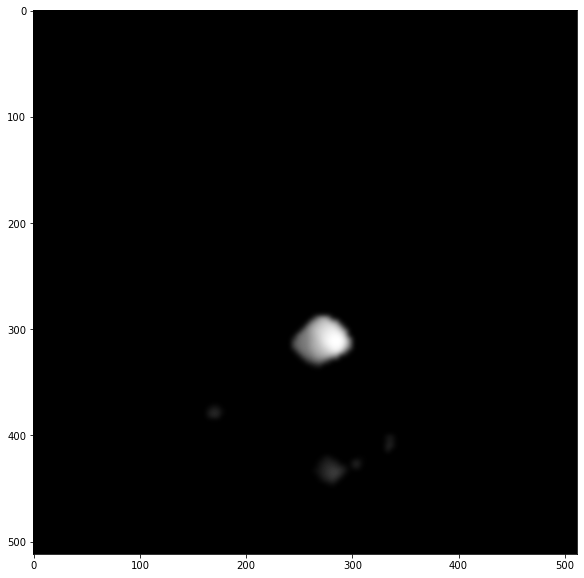

In [42]:
plt.imshow(uad[168])